In [7]:
import numpy as np # linear algebra
import pandas as pd 
import os


In [8]:
!ls img | wc -l

143818


In [9]:
!ls img | tail

fd14767e-5952-11ec-b456-cbdf60c769fa.jpg
fd1476d8-5952-11ec-b457-671e5fb87011.jpg
fd147732-5952-11ec-b458-eb420e48d424.jpg
fd14778c-5952-11ec-b459-ff0b9855c73b.jpg
fd1477e6-5952-11ec-b45a-c77dbc715bb9.jpg
fd14784a-5952-11ec-b45b-8b7b04eb67a4.jpg
fd1479da-5952-11ec-b45c-8b6bfcc59c9c.jpg
fd147a48-5952-11ec-b45d-7bb4b2df3cf7.jpg
fd147aa2-5952-11ec-b45e-0b89448a20c7.jpg
fd147afc-5952-11ec-b45f-1fc2e6e98b13.jpg


In [10]:
image_path = 'img'
df = pd.read_csv('data.csv')
df

img_id  cam_id  seq_id  frame_id  \
0       da7c5ef0-db28-11ea-b693-9b3523cc10a5      60   13209        33   
1       da7c5ef0-db28-11ea-b693-9b3523cc10a5      60   13209        33   
2       da7c5ef0-db28-11ea-b693-9b3523cc10a5      60   13209        33   
3       da7c5ef0-db28-11ea-b693-9b3523cc10a5      60   13209        33   
4       da7c5ef0-db28-11ea-b693-9b3523cc10a5      60   13209        33   
...                                      ...     ...     ...       ...   
549204  fcdecc18-5952-11ec-a87d-47788f674eed      93      15        28   
549205  fcdeef2c-5952-11ec-a8ae-cf526681fdda      93      15        77   
549206  fcdeef2c-5952-11ec-a8ae-cf526681fdda      93      15        77   
549207  fcdeef2c-5952-11ec-a8ae-cf526681fdda      93      15        77   
549208  fc7bb998-5952-11ec-a723-9b111499f3ca      86       7        19   

        bbox_id  x_min  x_max  y_min  y_max        label_l1 label_l2  fao_mfa  \
0             1    626    754     -1     88           Human    HUMAN       81   
1             3    544    710     15    203           Human    HUMAN       81   
2             4    629    735    210    562           Human    HUMAN       81   
3             5    615    883    550    907           Human    HUMAN       81   
4             6    885    962    826    875         Unknown      OTH       81   
...         ...    ...    ...    ...    ...             ...      ...      ...   
549204   126812    227    510    702    992  Yellowfin tuna      YFT       81   
549205   128339    223    518    700    996  Yellowfin tuna      YFT       81   
549206   128338    875   1127    668   1030  Yellowfin tuna      YFT       81   
549207   128337   1069   1465    487    674  Yellowfin tuna      YFT       81   
549208    47699    466    702    557    677  Yellowfin tuna      YFT       81   

        train    val   test  
0        True  False  False  
1        True  False  False  
2        True  False  False  
3        True  False  False  
4        True  False  False  
...       ...    ...    ...  
549204  False  False   True  
549205  False  False   True  
549206  False  False   True  
549207  False  False   True  
549208  False  False   True  

[549209 rows x 15 columns]

In [11]:
df['label_l2'].value_counts()

label_l2
HUMAN    281040
YFT      129193
ALB       81471
SKJ       22256
BET        9700
OTH        9494
BILL       6211
DOL        4425
NoF        1965
LAG        1681
TUNA        835
SHARK       809
WATER        74
PLS          51
OIL           4
Name: count, dtype: int64

In [12]:
df['label_l1'].value_counts()

label_l1
Human                      281040
Yellowfin tuna             129193
Albacore                    81471
Skipjack tuna               22256
Bigeye tuna                  9700
Unknown                      6779
Mahi mahi                    4425
Shortbill spearfish          2193
No fish                      1965
Opah                         1681
Swordfish                    1664
Striped marlin               1196
Blue marlin                   889
Tuna                          835
Shark                         808
Oilfish                       778
Wahoo                         677
Escolar                       673
Great barracuda               182
Long snouted lancetfish       176
Indo Pacific sailfish         129
Sickle pomfret                 83
Black marlin                   83
Lancetfish                     81
Water                          74
Marlin                         57
Pomfret                        54
Pelagic stingray               51
Mola mola                       6
Roudi

In [13]:
df.columns

Index(['img_id', 'cam_id', 'seq_id', 'frame_id', 'bbox_id', 'x_min', 'x_max',
       'y_min', 'y_max', 'label_l1', 'label_l2', 'fao_mfa', 'train', 'val',
       'test'],
      dtype='object')

In [14]:
img_test_name = df.loc[0,'img_id']
bboxs= df[df['img_id'] == img_test_name][['x_min', 'y_min','x_max', 'y_max']].to_numpy()
bboxs

array([[626,  -1, 754,  88],
       [544,  15, 710, 203],
       [629, 210, 735, 562],
       [615, 550, 883, 907],
       [885, 826, 962, 875]])

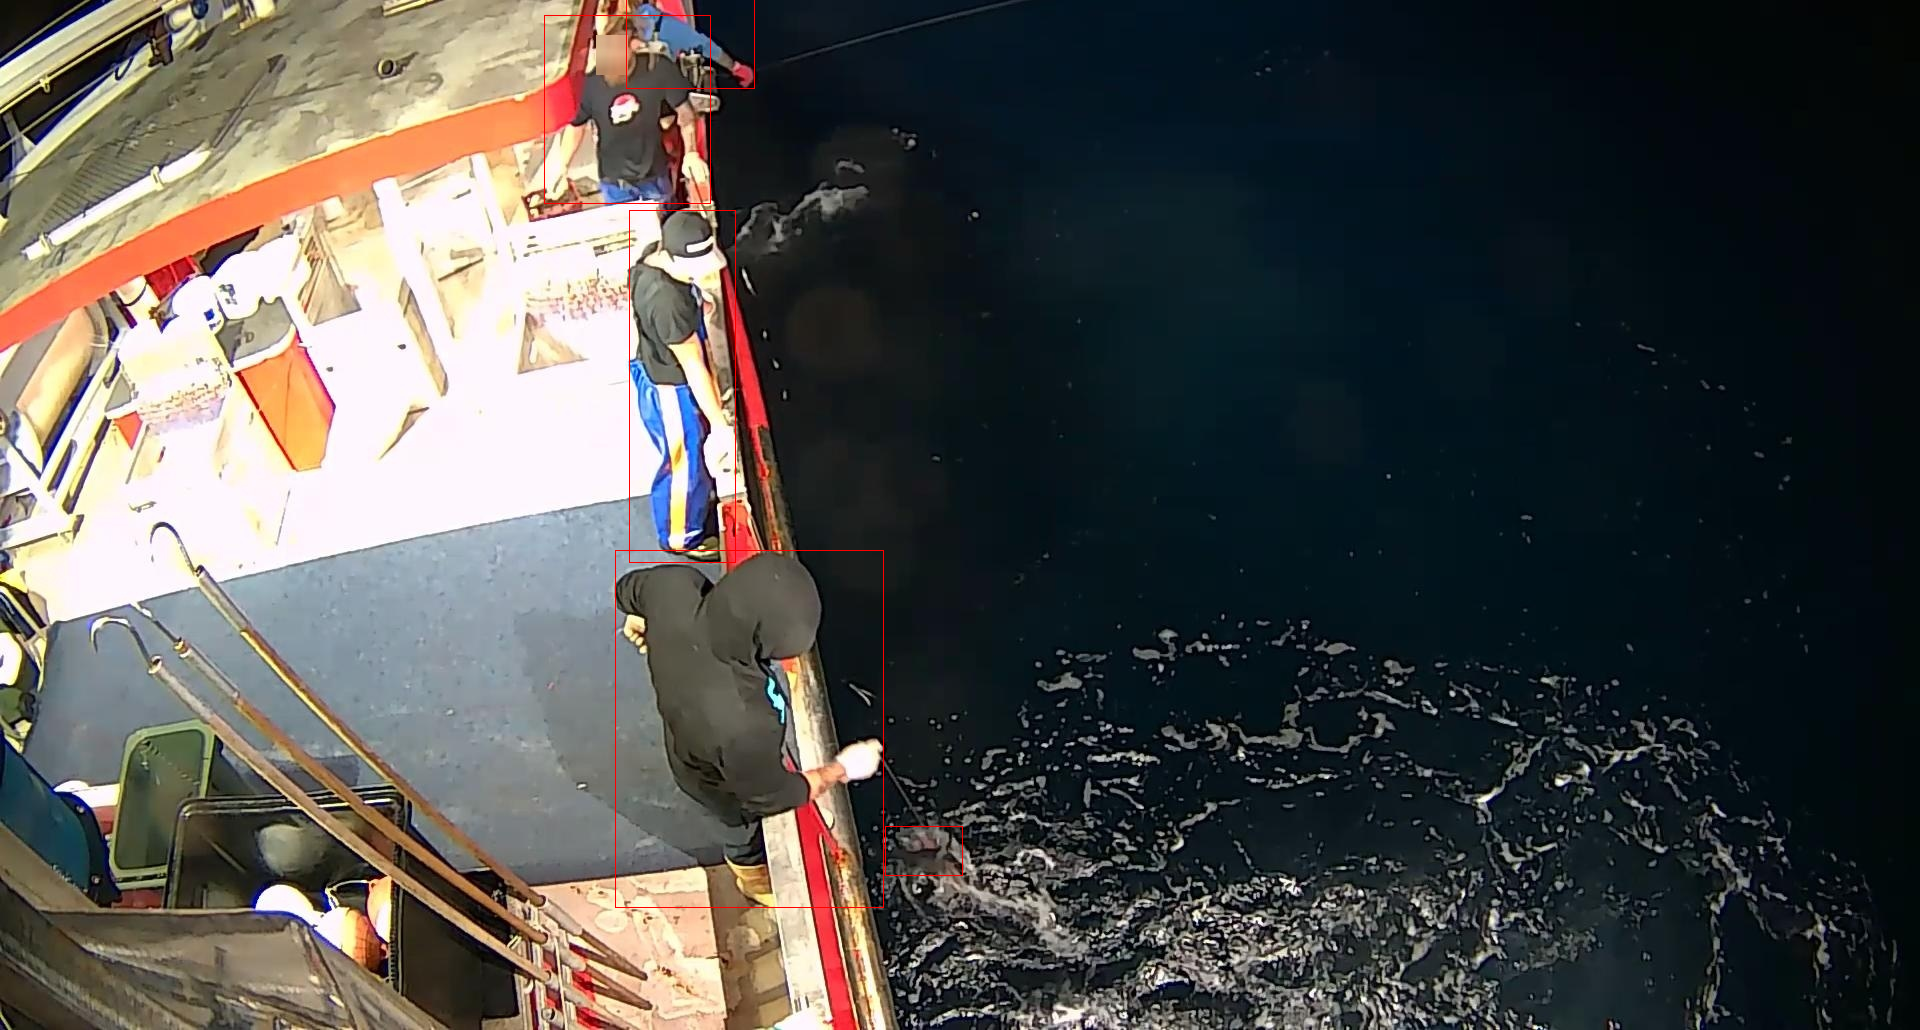

In [15]:
from PIL import Image, ImageDraw
img_test = Image.open(f'{image_path}/{img_test_name}.jpg')
img_test_draw = ImageDraw.Draw(img_test)
for bbox in bboxs:
    img_test_draw.rectangle(bbox, outline='red')
img_test   

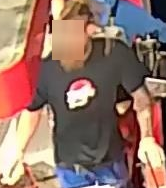

In [17]:
img_test = Image.open(f'{image_path}/{img_test_name}.jpg')
croped_image = []
for bbox in bboxs:
    croped_image.append(img_test.crop(bbox))
croped_image[1]   

In [20]:
croped_image[1].save('test.png',format='PNG')

In [23]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
img_rgb = cv2.imread(f'{image_path}/{img_test_name}.jpg' )
img_gray = cv2.cvtColor(np.array(img_rgb), cv2.COLOR_BGR2GRAY) 
template = cv2.imread('test.png',0) 
w, h = template.shape[::-1] 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) 
threshold = 0.7 
loc = np.where( res >= threshold)
 
for pt in zip(*loc[::-1]): 
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 3) 
cv2.imwrite('donuts-found.jpg',img_rgb)

True

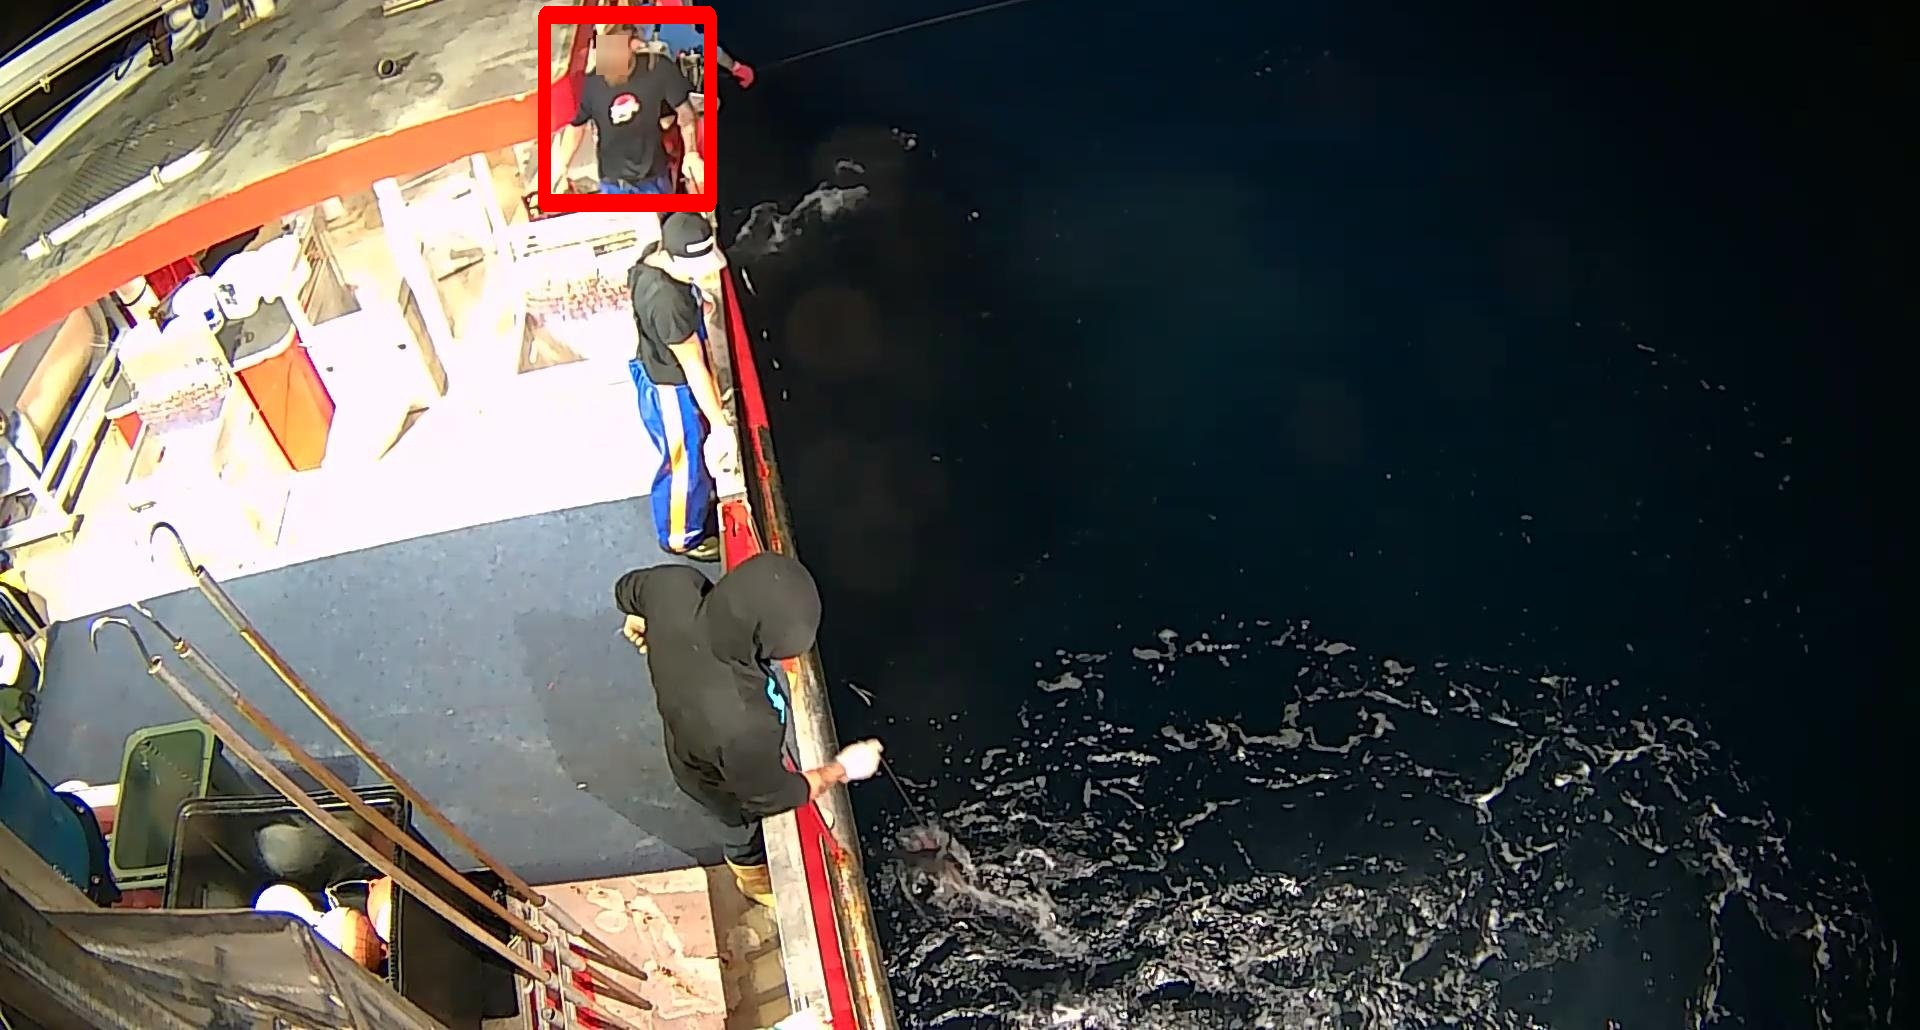

In [24]:
Image.open('donuts-found.jpg')

In [ ]:
detector = Cascade(trained_file)

img = data.astronaut()

detected = detector.detect_multi_scale(
    img=img, scale_factor=1.2, step_ratio=1, min_size=(60, 60), max_size=(123, 123)
)

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

for patch in detected:
    ax.axes.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2,
        )
    )

plt.show()